# PylandTemp Algorithms Comparisons

Import needed libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio.plot
import rasterio

Declare variables to store data

In [3]:
url = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
redband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(4) # L1TP_216074_20160531_20180528_01_T1_B4.TIF'
nirband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(5)
tempband10 = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(10)
tempband11 = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(10)

Open geospatial raster data with rasterio library

In [4]:
with rasterio.open(url+redband) as src:
    redImage = src.read(1).astype('f4')

with rasterio.open(url+nirband) as src:
    nirImage = src.read(1).astype('f4')
    
with rasterio.open(url+tempband10) as src:
    tempImage10 = src.read(1).astype('f4')
    
with rasterio.open(url+tempband11) as src:
    tempImage11 = src.read(1).astype('f4')
    
   

# Compare LST methods

Keep emmisivity method constant, compare LST methods

In [5]:
from pylandtemp import split_window
# comparing the LST methods, with emissivity_method='avdan' 
lst_image_split_window_jiminez_avdan = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='jiminez-munoz', 
    emissivity_method='avdan', unit='kelvin')
lst_image_split_window_kerr = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='kerr', 
    emissivity_method='avdan', unit='kelvin')
lst_image_split_window_price = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='price', 
    emissivity_method='avdan', unit='kelvin')
lst_image_split_window_sobrino_1993 = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='sobrino-1993', 
    emissivity_method='avdan', unit='kelvin')
lst_image_split_window_mc_millin = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='mc-millin', 
    emissivity_method='avdan', unit='kelvin')

In [6]:
lst_image_split_window_jiminez_avdan

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [16]:
'''
lst_image_split_window_mc_clain = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='mc-clain', 
    emissivity_method='avdan', unit='kelvin')
    
lst_method='mc-clain' errors out. check pylandtemp/pylandtemp implementation. does it refer to 'mc-millin' instead 
(as seen in the 'Supported Algorithms' page )
'''

"\nlst_image_split_window_mc_clain = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='mc-clain', \n    emissivity_method='avdan', unit='kelvin')\n    \nlst_method='mc-clain' errors out. check pylandtemp/pylandtemp implementation. does it refer to 'mc-millin' instead\n"

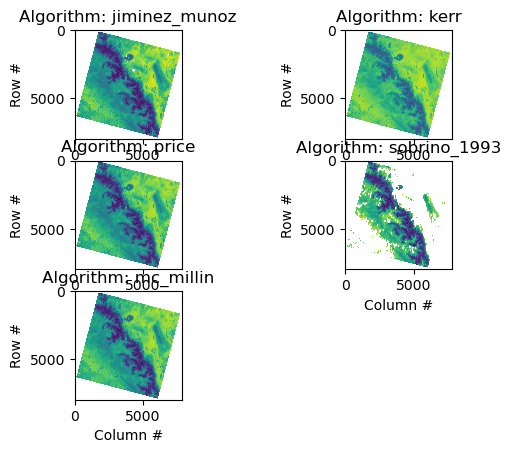

In [7]:
import matplotlib.pyplot as plt
import numpy as np


plt.subplot(321) #1 row, 2 col, positon 1
plt.imshow(lst_image_split_window_jiminez_avdan)
method= 'jiminez_munoz'
# plt.title('{}\n LST in Kelvin {}'.format(f'Algorithm: {method}', lst_image_split_window_jiminez_avdan.shape))
plt.title(f'Algorithm: {method}')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.subplot(322)
plt.imshow(lst_image_split_window_kerr)
method= 'kerr'
# plt.title('{}\n LST in Kelvin {}'.format(f'Algorithm: {method}', lst_image_split_window_mc_millin.shape))
plt.title(f'Algorithm: {method}')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.subplot(323)
plt.imshow(lst_image_split_window_price)
method= 'price'
# plt.title('{}\n LST in Kelvin {}'.format(f'Algorithm: {method}', lst_image_split_window_mc_millin.shape))
plt.title(f'Algorithm: {method}')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.subplot(324)
plt.imshow(lst_image_split_window_sobrino_1993)
method= 'sobrino_1993'
# plt.title('{}\n LST in Kelvin {}'.format(f'Algorithm: {method}', lst_image_split_window_mc_millin.shape))
plt.title(f'Algorithm: {method}')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.subplot(325)
plt.imshow(lst_image_split_window_mc_millin)
method= 'mc_millin'
# plt.title('{}\n LST in Kelvin {}'.format(f'Algorithm: {method}', lst_image_split_window_mc_millin.shape))
plt.title(f'Algorithm: {method}')
plt.xlabel('Column #')
plt.ylabel('Row #')

# plt.tight_layout()
plt.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=None,
                    hspace=None)
# # plt.colorbar()


# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(cax=cax)
plt.show()

- Use subplots and a single legend for all the plots. This means you compute all the outputs and then plot at once on a single subplot

# Sensitivity analysis: how does LST values change with different emmisivity methods

Keep LST method constant, compare emissivity methods

If I keep the lST method constant and I only vary the emmisivity method, what happens to the output LST. Choose a single LST method which in this case will be **single window** method.

In [8]:
'''
Emmisivity will be compard (varied) and we keep lst constant
For flexibility also, I check first for 'mono-window' vs 'jiminez_munoz' ---> jiminez_munoz did not work
can only use mono-window for single window algorithm.
'''
from pylandtemp import single_window
lst_mono_window_avdan = single_window(
    landsat_band_10= tempImage10,
    landsat_band_4=  redImage,
    landsat_band_5= nirImage,
    lst_method= "mono-window",
    emissivity_method= "avdan",
    unit= "kelvin",
)

# lst_jiminez_munoz_window = single_window(
#     landsat_band_10= tempImage10,
#     landsat_band_4=  redImage,
#     landsat_band_5= nirImage,
#     lst_method= "jiminez_munoz",
#     emissivity_method= "avdan",
#     unit= "kelvin",
# )

lst_mono_window_gopinadh = single_window(
    landsat_band_10= tempImage10,
    landsat_band_4=  redImage,
    landsat_band_5= nirImage,
    lst_method= "mono-window",
    emissivity_method= "gopinadh",
    unit= "kelvin",
)

lst_mono_window_xiaolei = single_window(
    landsat_band_10= tempImage10,
    landsat_band_4=  redImage,
    landsat_band_5= nirImage,
    lst_method= "mono-window",
    emissivity_method= "xiaolei",
    unit= "kelvin",
)


/opt/anaconda3/lib/python3.9/site-packages/pylandtemp/temperature/algorithms/mono_window.py:56: RuntimeWarning: invalid value encountered in log
  1 + (((0.0000115 * temperature_band) / 14380) * np.log(emissivity))


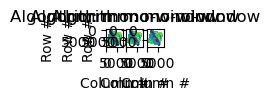

In [12]:
import matplotlib.pyplot as plt
import numpy as np


plt.subplot(131) #1 row, 2 col, positon 1
plt.imshow(lst_mono_window_avdan)
method= 'mono-window'
#plt.title('{}\n LST in Kelvin {}'.format(f'Algorithm: {method}', lst_mono_window_avdan.shape))
plt.title(f'Algorithm: {method}')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.subplot(132) #1 row, 2 col, positon 1
plt.imshow(lst_mono_window_gopinadh)
method= 'mono-window'
# plt.title('{}\n LST in Kelvin {}'.format(f'Algorithm: {method}', lst_mono_window_gopinadh.shape))
plt.title(f'Algorithm: {method}')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.subplot(133) #1 row, 2 col, positon 1
plt.imshow(lst_mono_window_xiaolei)
method= 'mono-window'
# plt.title('{}\n LST in Kelvin {}'.format(f'Algorithm: {method}', lst_mono_window_xiaolei.shape))
plt.title(f'Algorithm: {method}')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.subplots_adjust(left=0.1,
                    bottom=None,
                    right=0.1,
                    top=None,
                    wspace=None,
                    hspace=None)#0.7)

plt.show()

In [38]:
import seaborn as sns

plt.hist(lst_image_split_window_jiminez_gopinadh[3000:3500, 3000:3500], bins='auto')
plt.show()

sns.displot(lst_image_split_window_jiminez_gopinadh)

# Baseline to be fixed into the sections above

In [19]:
lst_image_single_window = single_window(tempImage10, redImage, nirImage, unit='celcius')

plt.imshow(lst_image_single_window)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'Single window method', lst_image_single_window.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

# Compute and plot land surface temperature using different split window algorithms and emmisivity methods


In [21]:
from pylandtemp import split_window

lst_method='jiminez-munoz'

In [22]:
# compute lst with split window method, lst_method='jiminez-munoz',  emissivity_method='avdan'

lst_image_split_window_jiminez_avdan = split_window(
    tempImage10, 
    tempImage11, 
    redImage, 
    nirImage, 
    lst_method='jiminez-munoz', 
    emissivity_method='avdan', 
    unit='kelvin'
)

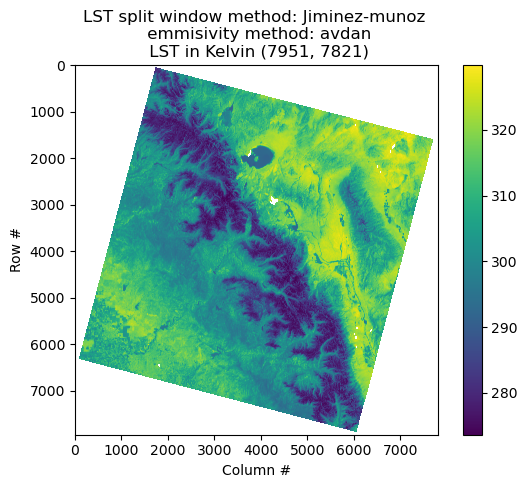

In [23]:
plt.imshow(lst_image_split_window_jiminez_avdan)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'LST split window method: Jiminez-munoz \n emmisivity method: avdan', lst_image_split_window_jiminez_avdan.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

In [24]:
# compute lst with split window method, lst_method='jiminez-munoz',  emissivity_method='xiaolei'   

lst_image_split_window_jiminez_xiaolei = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='jiminez-munoz', 
    emissivity_method='xiaolei', unit='kelvin')

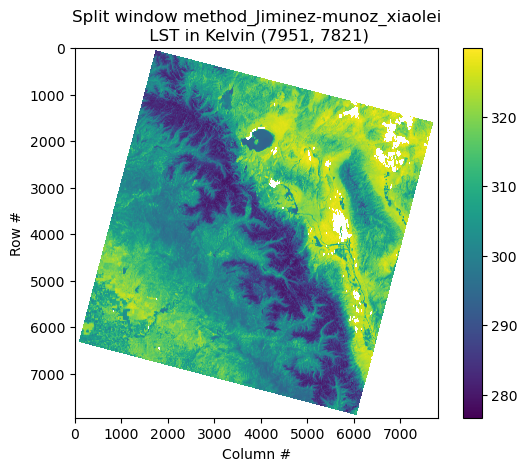

In [25]:
plt.imshow(lst_image_split_window_jiminez_xiaolei)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'Split window method_Jiminez-munoz_xiaolei', lst_image_split_window_jiminez_xiaolei.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

In [26]:
# compute lst with split window method, lst_method='jiminez-munoz',  emissivity_method='gopinadh'   

lst_image_split_window_jiminez_gopinadh = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='jiminez-munoz', 
    emissivity_method='gopinadh', unit='kelvin')

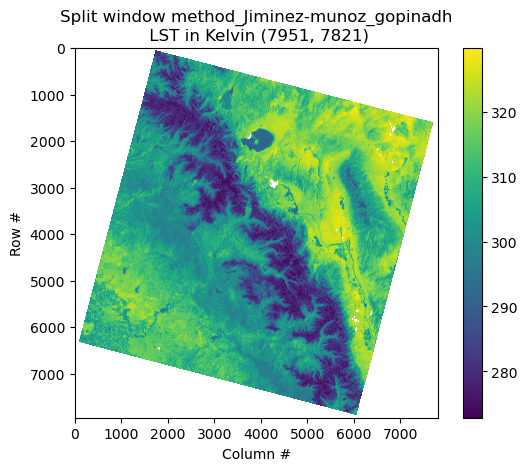

In [27]:
plt.imshow(lst_image_split_window_jiminez_gopinadh)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'Split window method_Jiminez-munoz_gopinadh', lst_image_split_window_jiminez_gopinadh.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

lst_method='kerr'

In [28]:
'''
emmisivity method string should correctly be:

'advan' == 'avdan'

else, the split_window() always throws an error

'''

"\nemmisivity method string should correctly be:\n\n'advan' == 'avdan'\n\nelse, the split_window() always throws an error\n\n"

In [29]:
# compute lst with split window method, lst_method='kerr',  emissivity_method='avdan'   

lst_image_split_window_kerr_avdan = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='kerr', 
    emissivity_method='avdan', unit='kelvin')

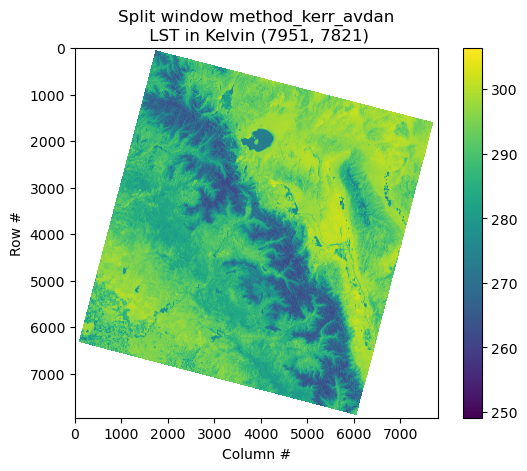

In [30]:
plt.imshow(lst_image_split_window_kerr_avdan)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'Split window method_kerr_avdan', lst_image_split_window_kerr_avdan.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

In [31]:
# compute lst with split window method, lst_method='kerr',  emissivity_method='xiaolei'    

lst_image_split_window_kerr_xiaolei = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='kerr', 
    emissivity_method='xiaolei', unit='kelvin')

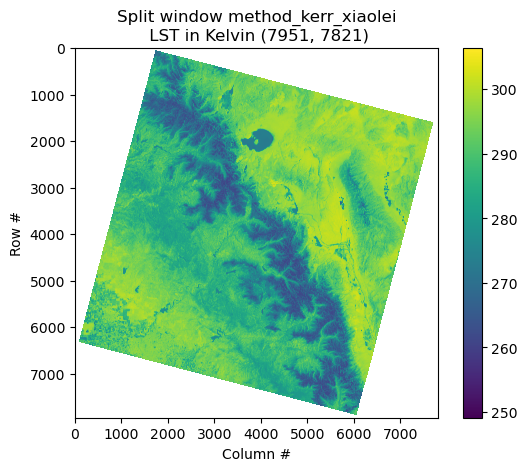

In [32]:
plt.imshow(lst_image_split_window_kerr_xiaolei)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'Split window method_kerr_xiaolei', lst_image_split_window_kerr_xiaolei.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

In [33]:
# compute lst with split window method, lst_method='kerr',  emissivity_method='gopinadh'    

lst_image_split_window_kerr_gopinadh = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='kerr', 
    emissivity_method='gopinadh', unit='kelvin')

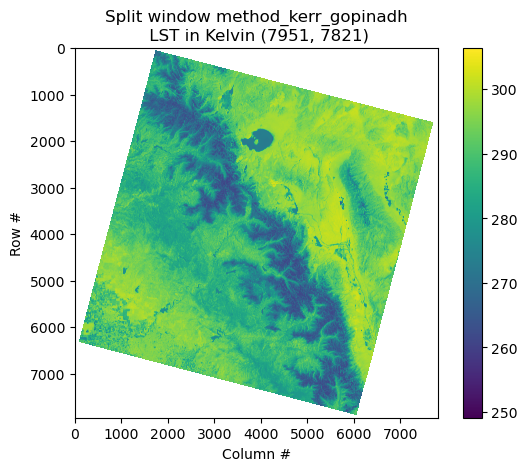

In [34]:
plt.imshow(lst_image_split_window_kerr_gopinadh)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'Split window method_kerr_gopinadh', lst_image_split_window_kerr_gopinadh.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

lst_method='mc-clain'

In [35]:
# compute lst with split window method, lst_method='mc-clain',  emissivity_method='avdan'    

lst_image_split_window_mcclain_avdan = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='kerr', 
    emissivity_method='avdan', unit='kelvin')

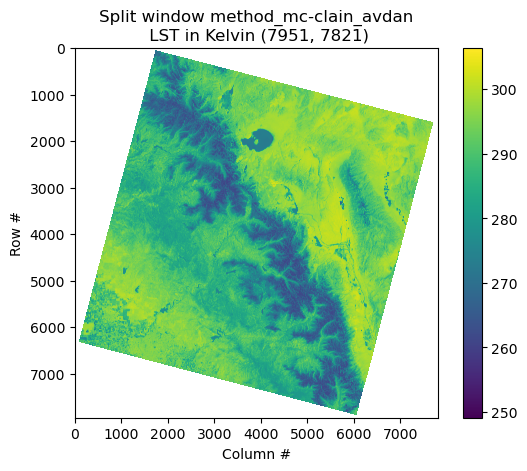

In [36]:
plt.imshow(lst_image_split_window_mcclain_avdan)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'Split window method_mc-clain_avdan', lst_image_split_window_mcclain_avdan.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

In [37]:
# compute lst with split window method, lst_method='mc-clain',  emissivity_method='avdan'    

lst_image_split_window_mcclain_avdan = split_window(tempImage10, tempImage11, redImage, nirImage, lst_method='mc-clain', 
    emissivity_method='avdan', unit='kelvin')

ValueError: Requested method not implemented. Choose among available methods: [<class 'pylandtemp.temperature.algorithms.split_window.algorithms.SplitWindowJiminezMunozLST'>, <class 'pylandtemp.temperature.algorithms.split_window.algorithms.SplitWindowKerrLST'>, <class 'pylandtemp.temperature.algorithms.split_window.algorithms.SplitWindowMcMillinLST'>, <class 'pylandtemp.temperature.algorithms.split_window.algorithms.SplitWindowPriceLST'>, <class 'pylandtemp.temperature.algorithms.split_window.algorithms.SplitWindowSobrino1993LST'>]

In [ ]:
plt.imshow(lst_image_split_window_mcclain_avdan)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'Split window method_mc-clain_avdan', lst_image_split_window_mcclain_avdan.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

In [ ]:
lst_image_split_window_jiminez_gopinadh